# Star Wars Survey

## Table of content
 
>### 1. Introduction 
>### 2. Read dataset
>### 3. Cleaning and Mapping Yes/No Columns
>### 4. Cleaning and Mapping Checkbox Columns
>### 5. Cleaning the Ranking Columns
>### 6. Finding the Highest-Ranked Movie
>### 7. Finding the Most Viewed Movie
>### 8. Exploring the Data by Binary Segments
>### 9. Conclusion

## Introduction

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

In this project, we will analyze data on the Star Wars movies.

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the dataset

In [2]:
star_wars = pd.read_csv("datasets/star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

Reading the dataset, we specify an encoding, because the dataset has some characters that aren't in Python's default utf-8 encoding.

In [3]:
# get an overview of the columns in the dataset
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Looking at the dataset we just read, we see that there are `1186 entries (rows)` and a total of columns `38 columns`

The data has several columns, including the following:

|Name|Description|
|:---|:---|
|RespondentID| An anonymized ID for the respondent (person taking the survey)|
|Gender|The respondent's gender|
|Age|The respondent's age|
|Household Income| The respondent's income|
|Education| The respondent's education level
|Location (Census Region)|The respondent's location|
|Have you seen any of the 6 films in the Star Wars franchise?| A Yes or No response|
|Do you consider yourself to be a fan of the Star Wars film franchise?| A Yes or No response|

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

----

## Cleaning and Mapping Yes/No Columns

In [5]:
# count each unique value in the column
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
# count each unique value in the column
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:

yes_no = {
    "Yes": True,
    "No": False
}

In [8]:
# convert column to Boolean with only True, False, and NaN
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

In [9]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
# convert column to Boolean with only True, False, and NaN

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [11]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply`.

The columns for this question are:

`Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.

`Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.

`Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.

`Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.

`Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
`Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [12]:
check_box_cols = list(star_wars.columns[3:9])
films = ["Star Wars: Episode I  The Phantom Menace",
         "Star Wars: Episode II  Attack of the Clones",
         "Star Wars: Episode III  Revenge of the Sith",
         "Star Wars: Episode IV  A New Hope",
         "Star Wars: Episode V The Empire Strikes Back",
         "Star Wars: Episode VI Return of the Jedi"]

for col, film in zip(check_box_cols, films):
    check_box_dict = { film: True, np.NaN: False}
    star_wars[col] = star_wars[col].map(check_box_dict)

In [13]:
# Rename each of the columns above so the names are more intuitive. 

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

In [14]:
star_wars[star_wars.columns[3:9]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from `least to most favorite`. `1` means the film was the most favorite, and `6` means it was the least favorite.

We will need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

Each of the following columns can contain the value `1, 2, 3, 4, 5, 6, or NaN`:

`Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film`. - How much the respondent liked `Star Wars: Episode I The Phantom Menace`

`Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`

`Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`

`Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`

`Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`

`Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi

In [15]:
# convert column 9 to 14 to float datatype
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
# Rename each of the columns above so the names are more intuitive. 

star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

In [17]:
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


## Finding the Highest-Ranked Movie

Now that we have cleaned up the ranking columns, we can find the highest-ranked movie quicker.

In [18]:
ranking = star_wars[star_wars.columns[9:15]].mean().sort_values()

In [19]:
ranking

ranking_5    2.513158
ranking_6    3.047847
ranking_4    3.272727
ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
dtype: float64

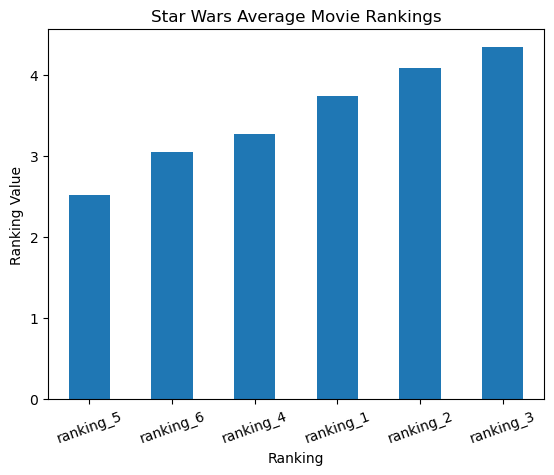

In [20]:
%matplotlib inline
ranking.plot.bar(rot=20)
plt.title("Star Wars Average Movie Rankings")
plt.ylabel('Ranking Value')
plt.xlabel('Ranking')
plt.show()

So far, we have done cleanining of our columns and now plotted a bar plot of the rankings.
    From the plot above, we observe that `ranking_5` corresponding to how much the respondent liked `Star Wars: Episode V The Empire Strikes Back` had the least ranking, while ranking_3 corresponding to how much the respondent liked `Star Wars: Episode III Revenge of the Sith` had the highest ranking.

## Finding the Most Viewed Movie

In [21]:
# compute the sum of each seen columns

seen_total = star_wars[star_wars.columns[3:9]].sum().sort_values()
print(seen_total)

seen_3    550
seen_2    571
seen_4    607
seen_1    673
seen_6    738
seen_5    758
dtype: int64


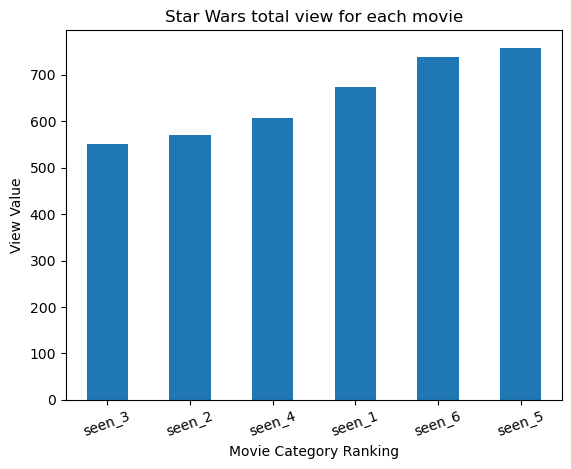

In [22]:
# Make a bar chart of each ranking
seen_total.plot.bar(rot=20)
plt.title("Star Wars total view for each movie")
plt.ylabel('View Value')
plt.xlabel('Movie Category Ranking')
plt.show()

From the bar chart, we observe that the `seen_5` which correspond to respondents who has watched `"Star Wars: Episode V The Empire Strikes"`is the most viewed movie, while `seen_3` which correspond to respondents who has watched `"Star Wars: Episode III  Revenge of the Sith"`is the least watched movie.
This result correlates with the rankings above. Remember we noted above that a lower ranking is better.

----

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

* `Do you consider yourself to be a fan of the Star Wars film franchise?` — `True` or `False`
* `Do you consider yourself to be a fan of the Star Trek franchise?` — `Yes` or `No`
* `Gender` — `Male` or `Female`

In [23]:
# split dataset into two groups based on gender

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

### Analyze the ranking for both gender

In [24]:
# compute the average ranking of each gender
ranking_m = males[males.columns[9:15]].mean()
ranking_f = females[females.columns[9:15]].mean()

print("Males Average Ranking:\n", ranking_m.sort_values())
print("\nFemales Average Ranking:\n", ranking_f.sort_values())

Males Average Ranking:
 ranking_5    2.458629
ranking_4    2.997636
ranking_6    3.002364
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
dtype: float64

Females Average Ranking:
 ranking_5    2.569270
ranking_6    3.078086
ranking_1    3.429293
ranking_4    3.544081
ranking_2    3.954660
ranking_3    4.418136
dtype: float64


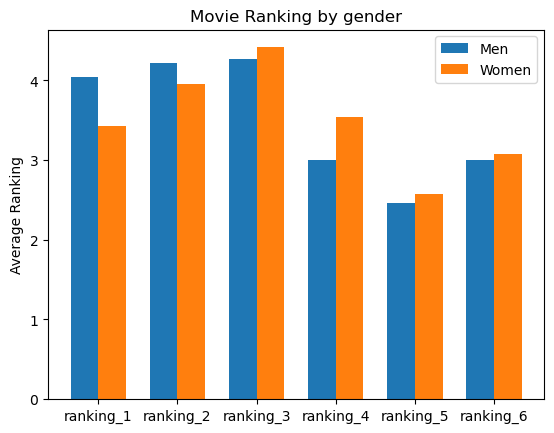

In [25]:
# plot a bar chat of each ranking based on gender
labels = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
x = np.arange(len(labels))  # the label locations
width = 0.35  # width of bars

fig, ax = plt.subplots()
ax.bar(x - width/2, ranking_m, width, label='Men')
ax.bar(x + width/2, ranking_f, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Ranking')
ax.set_title('Movie Ranking by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

From the plot, we realize that most of the rankings came from the men. However, for the most ranked movie of ranking_3, the women contributed the highest to this ranking. This therefore mean the highest ranked movie had most of it ranking form women.

----

### Analyze the views for both gender

In [26]:
# compute the sum of each views for both gender
seen_m = males[star_wars.columns[3:9]].sum()
seen_f = females[star_wars.columns[3:9]].sum()
print("Males Total Views:\n", seen_m.sort_values())
print("\nFemales Total Views:\n", seen_f.sort_values())

Males Total Views:
 seen_3    317
seen_2    323
seen_4    342
seen_1    361
seen_6    387
seen_5    392
dtype: int64

Females Total Views:
 seen_3    222
seen_2    237
seen_4    255
seen_1    298
seen_6    338
seen_5    353
dtype: int64


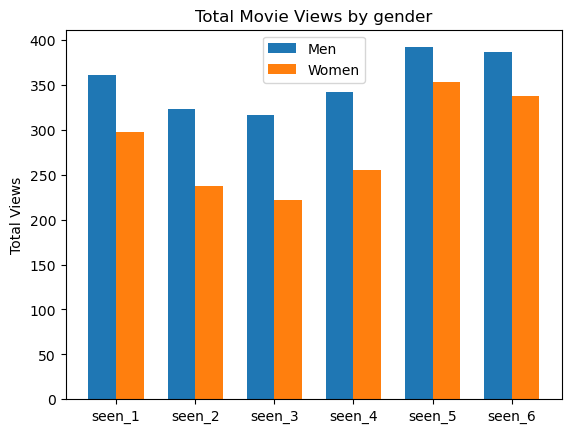

In [27]:
# plot a bar chat of each ranking based on gender
labels = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
x = np.arange(len(labels))  # the label locations
width = 0.35  # width of bars

fig, ax = plt.subplots()
ax.bar(x - width/2, seen_m, width, label='Men')
ax.bar(x + width/2, seen_f, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Views')
ax.set_title('Total Movie Views by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Taking a comparative look at the views, it can be seen that most of the views came from the men. This is seen in the most viewed movie "seen_5" where the men contribute more to the number of views. This holds same for every other movie in th dataset.

----

## Conclusion

Through out this project, we have analyzed the Star Wars Survey. 

Firstly, we observed that the movie `Star Wars: Episode III Revenge of the Sith` had the highest ranking while `Star Wars: Episode V The Empire Strikes Back` had the least ranking. Most of the rankings of the most ranked movie came from men. However, there are other movies where the women contributed more to the ranking.

Secondly, looking at the number of views for each movie, we concluded that `"Star Wars: Episode V The Empire Strikes"`is the most viewed movie, while `"Star Wars: Episode III  Revenge of the Sith"`is the least watched movie. Men contributed more to the number of views for all the different movies.

We had indicated that the lower the ranking, the better. This therefore showed a correlation in our results as the least ranked movie had the highest number of vies and vice versa.